## Match result dropna

In [1]:
import cv2
import math
import time
import json
import glob
import seaborn as sn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def plot_confusion_matrix(confusion_matrix,index,columns,x_label,y_label):
        df_cm = pd.DataFrame(confusion_matrix, index, columns)
        sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g')
        #sns.set(font_scale=1.4)
        #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='YlGnBu', fmt='g') # font size
        accuracy = sum(sum(np.eye(confusion_matrix.shape[0], dtype=int)*confusion_matrix))/sum(sum(confusion_matrix))
        plt.title("Accuracy:{}%\nComparison Matrix".format(round(accuracy*100,3)))
        plt.xlabel('{}'.format(x_label) , fontsize=18)
        plt.ylabel('{}'.format(y_label), fontsize=18)
        plt.show()
        
def get_accuracy_recallrate(array,raw):
    for index,class_ in enumerate(raw):
        class_predict_num = sum(array[:,index])
        class_true_num = sum(array[index])
        accuracy = array[index,index]/class_predict_num
        recall = array[index][index]/class_true_num
        print('Class {} Accuracy:{}% Recall_rate:{}%'.format(class_,round(accuracy*100,3),round(recall*100,3)))
        


In [3]:
Match_result_csv_path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/csv_file/PBL_match_result.csv'

In [4]:
Match_result_csv = pd.read_csv(Match_result_csv_path)

In [5]:
Match_result_dropna = Match_result_csv.dropna()
Match_result_dropna.to_csv('./csv_file/Match_result_dropna.csv')

In [6]:
Ground_truth_stage = Match_result_dropna['state']
PBL_predict_stage = Match_result_dropna['PBL_stage']

In [7]:
print(len(Ground_truth_stage) == len(PBL_predict_stage))
print(len(Ground_truth_stage))

True
563


In [8]:
Ground_truth_stage_list = list(Ground_truth_stage) 
PBL_predict_stage_list = list(PBL_predict_stage) 

In [9]:
print(set(Ground_truth_stage_list))
print(set(PBL_predict_stage_list))

{0, 1, 2, 3, -999}
{0.0, 1.0, 2.0, 3.0, -999.0}


In [10]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count0 = 0
count1 = 0
count2 = 0
count3 = 0
count999 = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    Ground_truth_stage_list_clean.append(G)
    if P == -999:
        PBL_predict_stage_list_clean.append(-999)
    else:
        PBL_predict_stage_list_clean.append(int(P))
    
    if P!=-999:
        if G==0 and int(P)==0:
            count0+=1
        elif G==1 and int(P)==1:
            count1+=1
        elif G==2 and int(P)==2:
            count2+=1
        elif G==3 and int(P)==3:
            count3+=1
            
print(count0)
print(count1)
print(count2)
print(count3)

84
123
19
18


In [11]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, 1, 2, 3, -999}
{0, 1, 2, 3, -999}


In [12]:
print(len(Ground_truth_stage_list_clean),len(PBL_predict_stage_list_clean))


563 563


In [13]:
from sklearn.metrics import confusion_matrix
array_5  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

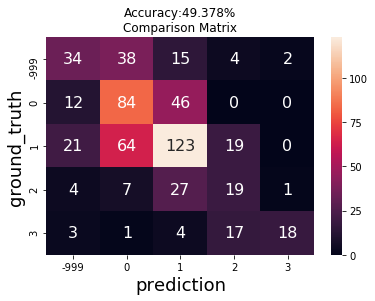

Class -999 Accuracy:45.946% Recall_rate:36.559%
Class 0 Accuracy:43.299% Recall_rate:59.155%
Class 1 Accuracy:57.209% Recall_rate:54.185%
Class 2 Accuracy:32.203% Recall_rate:32.759%
Class 3 Accuracy:85.714% Recall_rate:41.86%


In [14]:
raw_5 = ['-999','0','1','2','3']
columns_5 = ['-999','0','1','2','3']

plot_confusion_matrix(array_5,raw_5,columns_5,'prediction','ground_truth')
get_accuracy_recallrate(array_5,raw_5)

In [15]:
Ground_truth_stage_list_clean = []
PBL_predict_stage_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage_list,PBL_predict_stage_list):
    if G==1 or G==0:
        Ground_truth_stage_list_clean.append(0)
    else:
        Ground_truth_stage_list_clean.append(G)
    
    
    if P == 'False':
        PBL_predict_stage_list_clean.append(-999)
    elif int(P) ==1 or int(P) ==0:
        PBL_predict_stage_list_clean.append(0)
    else:
        PBL_predict_stage_list_clean.append(int(P))
    
    
    if P!='False':
        if G==2 and int(P)==2:
            count+=1
print(count)

19


In [16]:
print(set(Ground_truth_stage_list_clean))
print(set(PBL_predict_stage_list_clean))

{0, -999, 2, 3}
{0, -999, 2, 3}


In [17]:
from sklearn.metrics import confusion_matrix

array_4  = confusion_matrix(Ground_truth_stage_list_clean, PBL_predict_stage_list_clean)

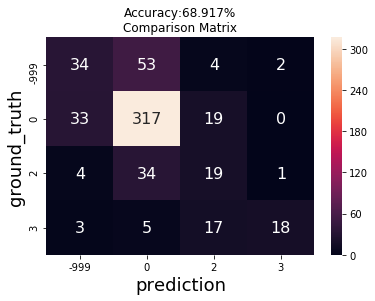

Class -999 Accuracy:45.946% Recall_rate:36.559%
Class 0 Accuracy:77.506% Recall_rate:85.908%
Class 2 Accuracy:32.203% Recall_rate:32.759%
Class 3 Accuracy:85.714% Recall_rate:41.86%


In [18]:
raw_4 = ['-999','0','2','3']
columns_4 = ['-999','0','2','3']

plot_confusion_matrix(array_4,raw_4,columns_4,'prediction','ground_truth')
get_accuracy_recallrate(array_4,raw_4)

In [19]:
get_accuracy_recallrate(array_4,raw_4)

Class -999 Accuracy:45.946% Recall_rate:36.559%
Class 0 Accuracy:77.506% Recall_rate:85.908%
Class 2 Accuracy:32.203% Recall_rate:32.759%
Class 3 Accuracy:85.714% Recall_rate:41.86%


In [20]:
#2D x:stage y:pbl_value


In [21]:
Ground_truth_stage = Match_result_dropna['state']
#Ground_truth_stage = Match_result_dropna['PBL_stage']
PBL_predict_PBL_value = Match_result_dropna['PBL_value']
print(len(Ground_truth_stage))
print(len(PBL_predict_PBL_value))

563
563


In [22]:
# print(set(Ground_truth_stage))
# print(set(PBL_predict_PBL_value))

In [23]:
y_Ground_truth_stage_list_clean = []
x_PBL_predict_PBL_value_list_clean = []

count = 0

for G,P in zip(Ground_truth_stage,PBL_predict_PBL_value):
    if G == -999 or int(P)==-999:
        pass
    else:
        y_Ground_truth_stage_list_clean.append(G)
        x_PBL_predict_PBL_value_list_clean.append(int(P))
        count+=1
        if int(P) > 50:
            print(int(P))
print(count)

57
430


In [24]:
print(set(y_Ground_truth_stage_list_clean))
print(set(x_PBL_predict_PBL_value_list_clean))

{0, 1, 2, 3}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 45, 46, 57}


In [25]:
c0 = y_Ground_truth_stage_list_clean.count(0)
c1 = y_Ground_truth_stage_list_clean.count(1)
c2 = y_Ground_truth_stage_list_clean.count(2)
c3 = y_Ground_truth_stage_list_clean.count(3)
cs = c0+c1+c2+c3
print(round((c0*100/cs),3),'%')
print(round((c1*100/cs),3),'%')
print(round((c2*100/cs),3),'%')
print(round((c3*100/cs),3),'%')


30.233 %
47.907 %
12.558 %
9.302 %


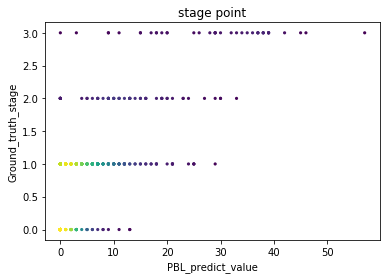

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = x_PBL_predict_PBL_value_list_clean
y = y_Ground_truth_stage_list_clean

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=10, edgecolor='')
plt.title("stage point")
plt.xlabel("PBL_predict_value")
plt.ylabel("Ground_truth_stage")
plt.show()

In [27]:
#stage 0,1,2,3
x0,y0 = [],[]
x1,y1 = [],[]
x2,y2 = [],[]
x3,y3 = [],[]
for x,y in zip(x_PBL_predict_PBL_value_list_clean,y_Ground_truth_stage_list_clean):
    if y == 0:
        x0.append(x)
        y0.append(y)
    elif y == 1:
        x1.append(x)
        y1.append(y)
    elif y == 2:
        x2.append(x)
        y2.append(y)
    elif y == 3:
        x3.append(x)
        y3.append(y)
x0count = x0.copy()
y0count = y0.copy()
x1count = x1.copy()
y1count = y1.copy()
x2count = x2.copy()
y2count = y2.copy()
x3count = x3.copy()
y3count = y3.copy()

x0.append(0)
y0.append(1)
x1.append(0)
y1.append(0)
x2.append(0)
y2.append(0)
x3.append(0)
y3.append(0)

In [28]:
# print(y0count)
# print(y1count)
# print(y2count)
# print(y3count)

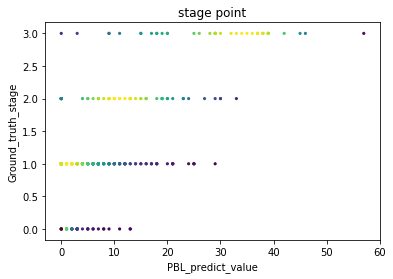

In [29]:
# Generate fake data

# Calculate the point density
xy0 = np.vstack([x0,y0])
z0 = gaussian_kde(xy0)(xy0)
xy1 = np.vstack([x1,y1])
z1 = gaussian_kde(xy1)(xy1)
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)
xy3 = np.vstack([x3,y3])
z3 = gaussian_kde(xy3)(xy3)

fig, ax = plt.subplots()
ax.scatter(x0, y0, c=z0, s=10, edgecolor='')
ax.scatter(x1, y1, c=z1, s=10, edgecolor='')
ax.scatter(x2, y2, c=z2, s=10, edgecolor='')
ax.scatter(x3, y3, c=z3, s=10, edgecolor='')
plt.title("stage point")
plt.xlabel("PBL_predict_value")
plt.ylabel("Ground_truth_stage")
plt.show()

[107, 14, 5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[93, 35, 31, 18, 10, 6, 4, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 3, 5, 11, 7, 5, 6, 3, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 3, 0, 3, 5, 0, 2, 5, 2, 3, 7, 4, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 1080x576 with 0 Axes>

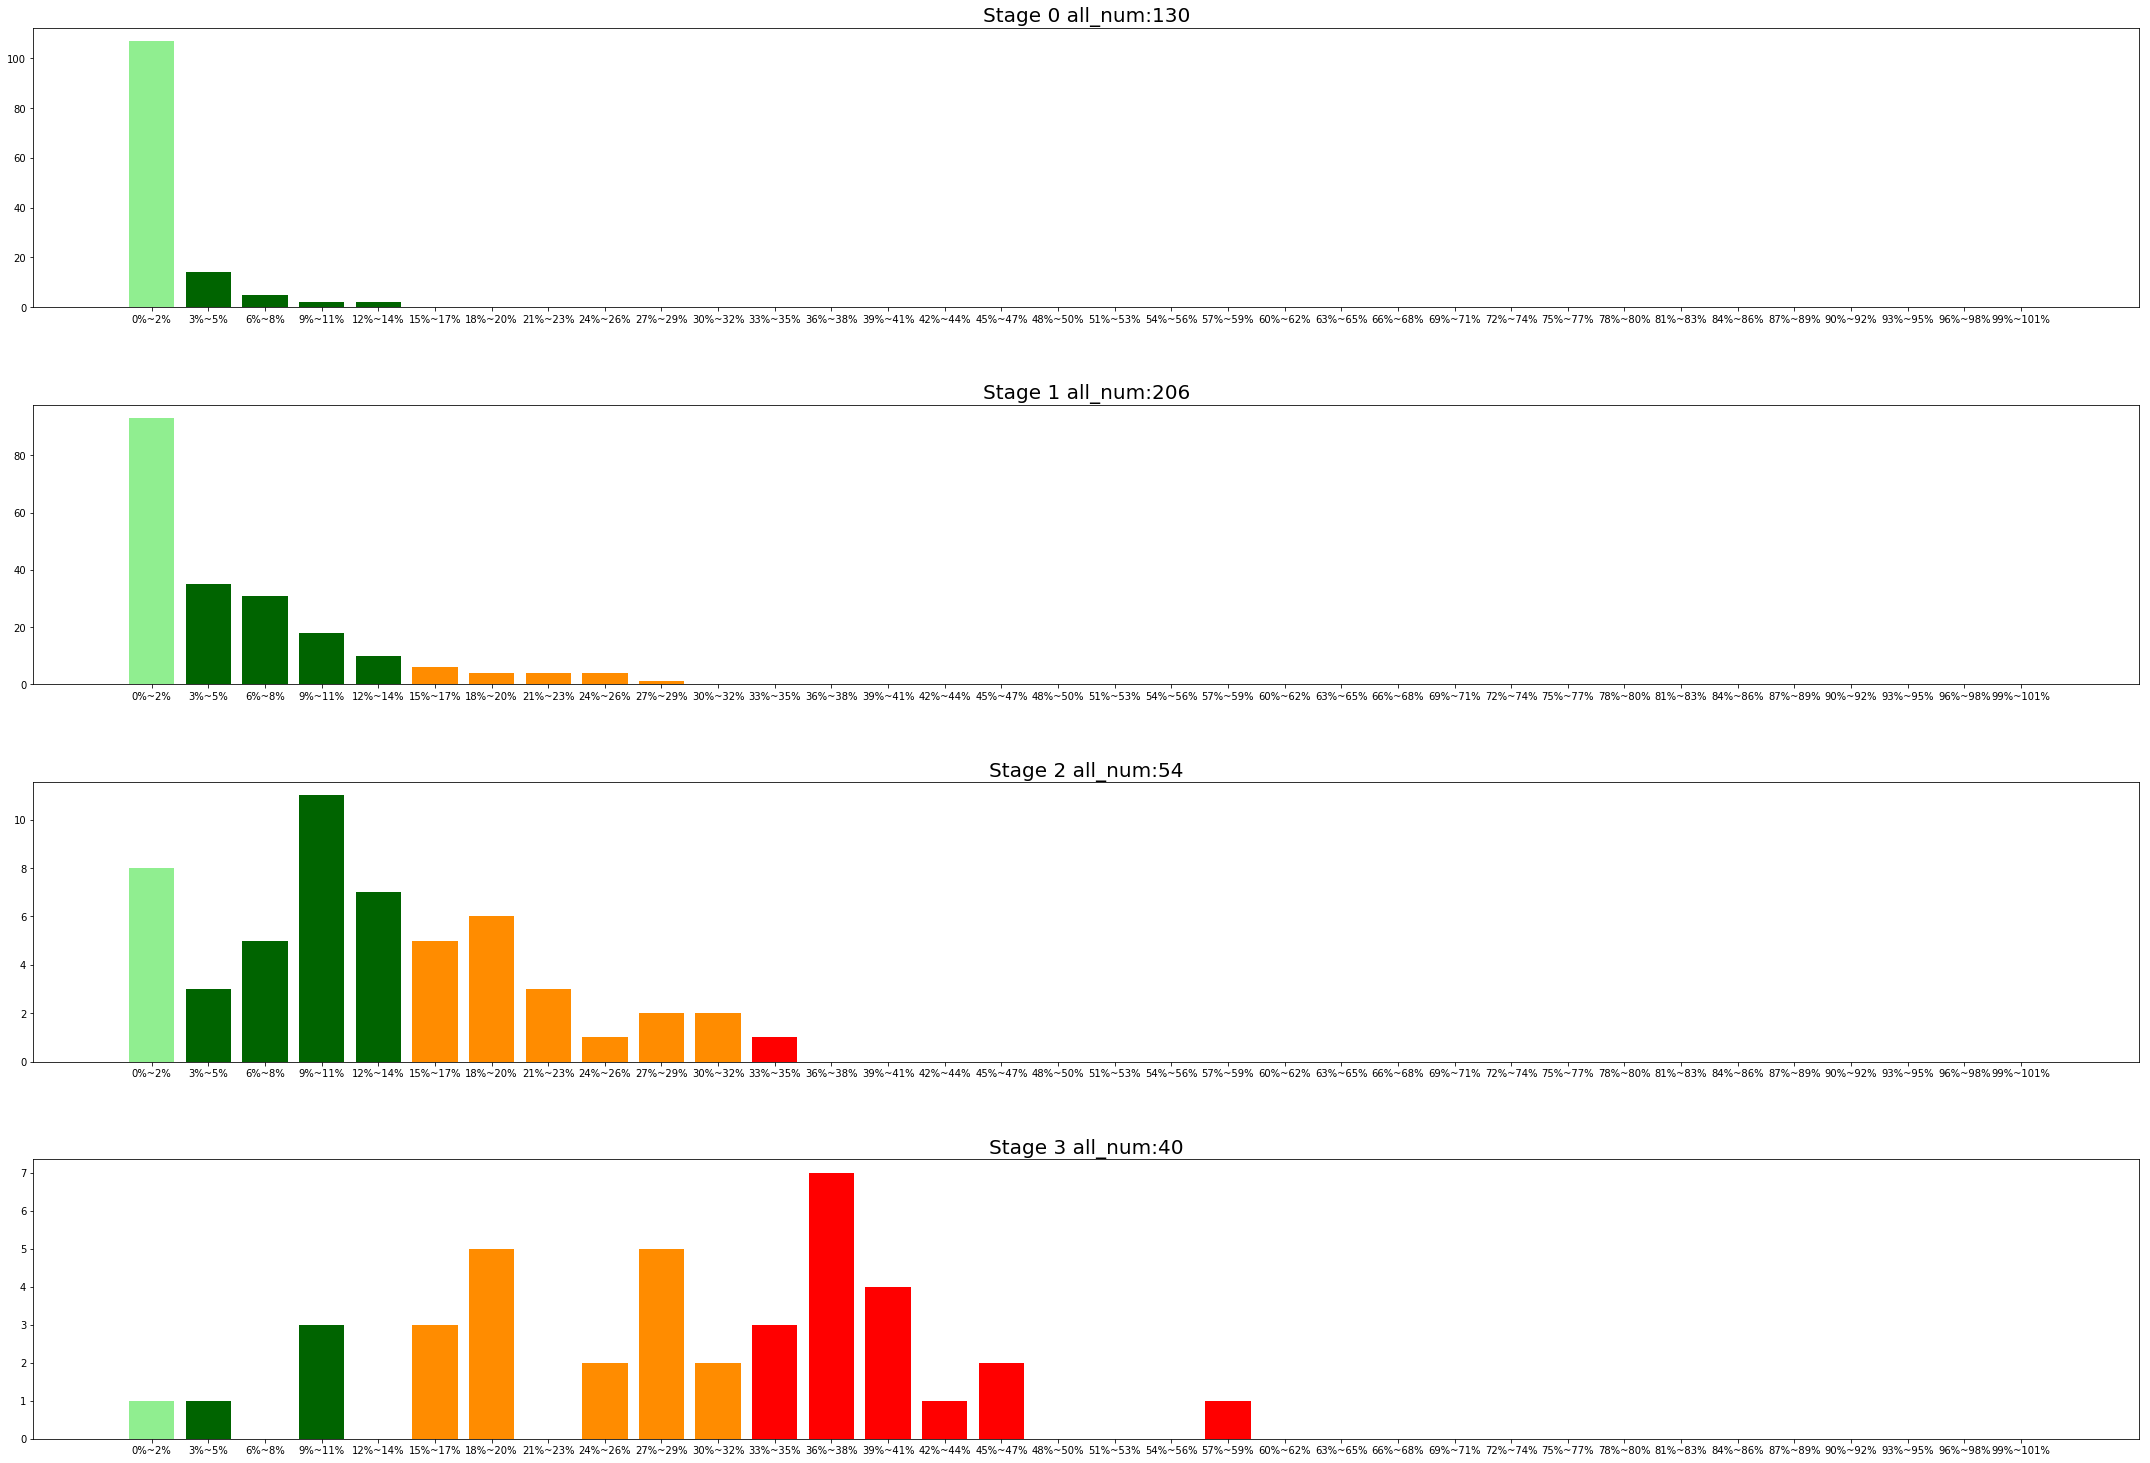

In [30]:
import matplotlib.pyplot as plt

def stage_(i):
    if i == 0:
        return 0
    elif i < 15:
        return 1
    elif i < 33:
        return 2
    elif i >= 33:
        return 3
    
def get_value_count(list_,min_,max_):
    count = 0
    for i in range(min_,max_+1):
        count = list_.count(i)+count
    return count

dict_ = {0:'lightgreen',1:'darkgreen',2:'darkorange',3:'r',}
color = [dict_[stage_(i*3)] for i in range(34)]

x = ['{}%~{}%'.format(i*3,(i+1)*3-1) for i in range(34)]

y0count = [ get_value_count(x0count,i*3,(i+1)*3-1) for i in range(34)] 
y1count = [ get_value_count(x1count,i*3,(i+1)*3-1) for i in range(34)] 
y2count = [ get_value_count(x2count,i*3,(i+1)*3-1) for i in range(34)] 
y3count = [ get_value_count(x3count,i*3,(i+1)*3-1) for i in range(34)] 

fig = plt.figure(figsize=(15,8))
fig, ax = plt.subplots(4, 1)
ax[0].bar(x, y0count, color = color)
ax[1].bar(x, y1count, color = color)
ax[2].bar(x, y2count, color = color)
ax[3].bar(x, y3count, color = color)

ax[0].set_title("Stage 0 all_num:{}".format(sum(y0count)), fontsize=20)
ax[1].set_title("Stage 1 all_num:{}".format(sum(y1count)), fontsize=20)
ax[2].set_title("Stage 2 all_num:{}".format(sum(y2count)), fontsize=20)
ax[3].set_title("Stage 3 all_num:{}".format(sum(y3count)), fontsize=20)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=5, 
                    top=5, 
                    wspace=8, 
                    hspace=0.35)

print(y0count)
print(y1count)
print(y2count)
print(y3count)

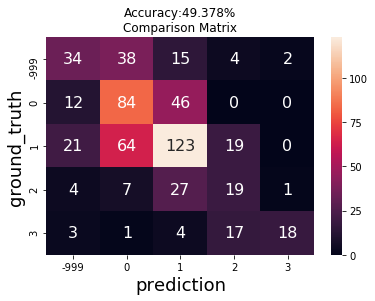

In [31]:
plot_confusion_matrix(array_5,raw_5,columns_5,'prediction','ground_truth')

## Count all the tooth that the model cannot find

In [32]:
Match_result_csv.values

array([[0, 'NN_190619_104716_EA3E9', '8M', ..., nan, nan, nan],
       [1, 'NN_190619_104716_EA3E9', '9M', ..., nan, nan, nan],
       [2, 'NN_190619_104716_EA3E9', '9D', ..., nan, nan, nan],
       ...,
       [23016, 'NN_160425_141130_EA4F1', '22M', ..., nan, nan, nan],
       [23017, 'NN_160425_141130_EA4F1', '22D', ..., nan, nan, nan],
       [23018, 'NN_160425_141130_EA4F1', '21M', ..., nan, nan, nan]],
      dtype=object)

In [33]:
All_tooth_name = list(Match_result_dropna['image_name'])

In [34]:
All_tooth_name_set = list(set(All_tooth_name))
print(len(All_tooth_name_set))

141


In [35]:
human_can_detect = Match_result_csv['state']
model_can_detect = Match_result_csv['PBL_stage']
print(len(human_can_detect) == len(model_can_detect))
print(len(human_can_detect))
human_can_detect_list = list(human_can_detect) 
model_can_detect_list = list(model_can_detect) 
print(set(Ground_truth_stage_list))
print(set(PBL_predict_stage_list))

True
23019
{0, 1, 2, 3, -999}
{0.0, 1.0, 2.0, 3.0, -999.0}


In [36]:
human_can_detect = []
model_can_detect = []

for tooth_name in tqdm(sorted(All_tooth_name_set),total = len(All_tooth_name_set)):
    #print(tooth_name)
    tooth_info = Match_result_csv.loc[Match_result_csv['image_name'] == '{}'.format(tooth_name)]
    #print(tooth_info)
    human_detect_info = tooth_info['state']
    model_detect_info = tooth_info['PBL_stage']
    for h,m in zip(human_detect_info,model_detect_info):

        if h == -999:
            human_can_detect.append(0)
        else:
            human_can_detect.append(1)
            
        if str(m) == 'nan' or m == 'False':
            model_can_detect.append(0)
        else:
            model_can_detect.append(1)

100%|██████████| 141/141 [00:00<00:00, 647.51it/s]


In [37]:
print(sum(human_can_detect))

624


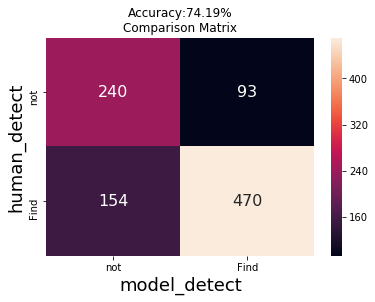

Missing rate 24.679487179487182 %


In [38]:
from sklearn.metrics import confusion_matrix

array = confusion_matrix(human_can_detect, model_can_detect)

index = ['not','Find']
columns = ['not','Find']

plot_confusion_matrix(array,index,columns,x_label='model_detect',y_label='human_detect')

print('Missing rate',(array[1][0]/sum(array[1]))*100,'%')

In [39]:
path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/5_pattern_detection_result/*.PNG'
root_PBL_list = glob.glob(path)

In [40]:
wierd_data = Match_result_csv.loc[Match_result_csv['PBL_value'] > 40]

In [41]:
for i in wierd_data['image_name']:
    print(i)

NN__191111_145310_24205
NN__191111_145310_24205
NN__191111_145403_2420D
NN_161012_110001_C03833
NN_180620_110702_16FA12


NN__191111_145310_24205 5


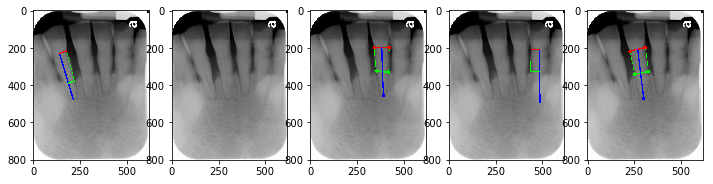

NN__191111_145310_24205 5


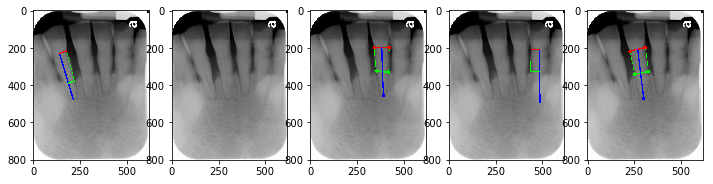

NN__191111_145403_2420D 4


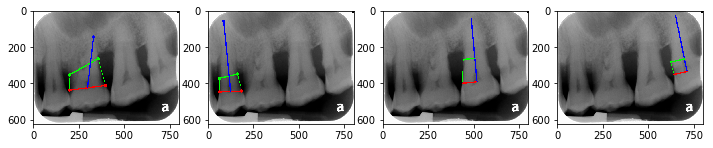

NN_161012_110001_C03833 4


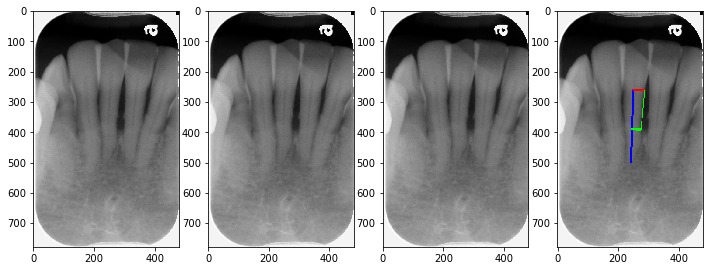

NN_180620_110702_16FA12 4


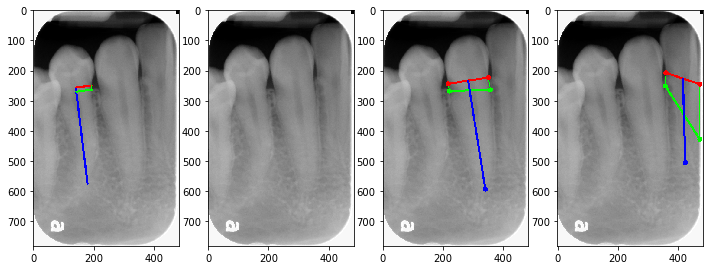

In [42]:
for wierd_image_name in wierd_data['image_name']:
    root_list = [root for root in root_PBL_list if wierd_image_name in root]
    print(wierd_image_name,len(root_list))
    plt.figure(figsize=(12,8))
    for index,image_path in enumerate(root_list):
        plt.subplot(1,len(root_list),index+1)
        plt.imshow(cv2.imread(image_path))
    plt.show()

In [43]:
wierd_data

,Unnamed: 0,image_name,tooth_num,state,PBL_predict_tooth,PBL_value,PBL_stage,tooth_path
1607,1607,NN__191111_145310_24205,26M,3,26_R,57.573,3.0,NN__191111_145310_24205_1.PNG
1611,1611,NN__191111_145310_24205,24D,3,24_R,42.366,3.0,NN__191111_145310_24205_4.PNG
1677,1677,NN__191111_145403_2420D,14D,3,14_R,46.396,3.0,NN__191111_145403_2420D_1.PNG
2537,2537,NN_161012_110001_C03833,25M,3,25_R,45.207,3.0,NN_161012_110001_C03833_5.PNG
5989,5989,NN_180620_110702_16FA12,26M,-999,26_R,55.941,3.0,NN_180620_110702_16FA12_4.PNG


In [44]:
# # import required classes

# from PIL import Image, ImageDraw, ImageFont

# # create Image object with the input image

# path = '/root/notebooks/tooth_project/tooth_PBL_detection/Pattern_detection/roots_point_detect/1_o_image/NN__191111_145309_24203.PNG'
# image = Image.open(path)
# # initialise the drawing context with
# # the image object as background

# draw = ImageDraw.Draw(image)

# # create font object with the font file and specify
# # desired size

# font = ImageFont.truetype('Roboto-Bold.ttf', size=30)

# # starting position of the message

# (x, y) = (50, 50)
# message = "LPBL:0% RBBL:100%\n Predict Stage:0,3"
# color = 'rgb(255, 0, 0)' # black color

# # draw the message on the background
# draw.text((x, y), message, fill=color, font=font)

# # save the edited image

# image.save('greeting_card.png')